<a href="https://colab.research.google.com/github/thomasathul/Rice-Plant-Disease-Detection/blob/main/InceptionV3model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split
import os
from glob import glob
import matplotlib.pyplot as plt

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
IMAGE_SIZE = [224, 224]
train_path='/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train'
valid_path='/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation'

In [70]:
images = glob(os.path.join(train_path, '*/*.jpg'))
total_images = len(images)
print('Total images:', total_images)

Total images: 1600


In [71]:
image_count = []
class_names = []

for folder in os.listdir(os.path.join(train_path)):
    folder_num = len(os.listdir(os.path.join(train_path, folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)

BrownSpot            400
Hispa                400
Healthy              400
LeafBlast            400


In [72]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet',  include_top=False)

In [73]:
for layer in inception.layers:
    layer.trainable = False

In [74]:
folders = glob('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/*')

In [75]:
folders

['/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/BrownSpot',
 '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/Hispa',
 '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/Healthy',
 '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train/LeafBlast']

In [76]:
x = Flatten()(inception.output)
     

In [77]:
prediction = Dense(len(folders), activation='softmax') (x) 

model = Model(inputs=inception.input, outputs=prediction)

In [78]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_282 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_282 (BatchN (None, 111, 111, 32) 96          conv2d_282[0][0]                 
__________________________________________________________________________________________________
activation_282 (Activation)     (None, 111, 111, 32) 0           batch_normalization_282[0][0]    
____________________________________________________________________________________________

In [79]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   )

In [81]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation', 
    shuffle=False, 
    class_mode="categorical",
    target_size=(224,224),
    batch_size=32)

Found 452 images belonging to 4 classes.


In [82]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train',
                                  target_size = (224, 224),
                                  batch_size = 32,
                                  class_mode = 'categorical')

Found 1600 images belonging to 4 classes.


In [83]:
r = model.fit_generator(
  training_set,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_generator)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 455s 9s/step - loss: 7.7474 - accuracy: 0.3451 - val_loss: 3.1595 - val_accuracy: 0.5111
Epoch 2/20
50/50 [==============================] - 442s 9s/step - loss: 3.1717 - accuracy: 0.5081 - val_loss: 4.3190 - val_accuracy: 0.3872
Epoch 3/20
50/50 [==============================] - 438s 9s/step - loss: 3.0164 - accuracy: 0.5415 - val_loss: 3.3134 - val_accuracy: 0.4779
Epoch 4/20
50/50 [==============================] - 446s 9s/step - loss: 2.2415 - accuracy: 0.6007 - val_loss: 3.4507 - val_accuracy: 0.4624
Epoch 5/20
50/50 [==============================] - 441s 9s/step - loss: 2.5993 - accuracy: 0.6052 - val_loss: 3.5800 - val_accuracy: 0.5022
Epoch 6/20
50/50 [==============================] - 434s 9s/step - loss: 2.8900 - accuracy: 0.6267 - val_loss: 5.3844 - val_accuracy: 0.5177
Epoch 7/20
50/50 [==============================] - 444s 9s/step - loss: 2.8668 - accuracy: 0.6186 - val_loss: 4.2706 - val_accuracy: 0.5199
Epoch 8/20
50

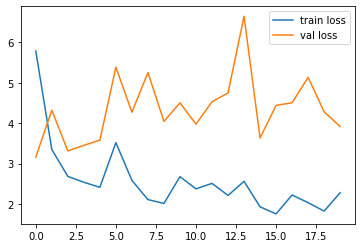

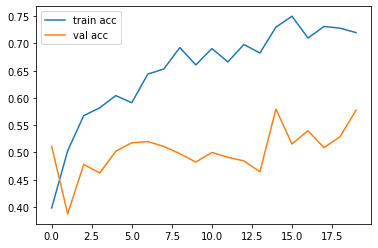

<Figure size 432x288 with 0 Axes>

In [84]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [85]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('ricemodel_inception.h5')

In [86]:
import cv2
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(valid_path, filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {class_names[class_idx]: probabilities[class_idx]}

SOURCE: class: LeafBlast, file: LeafBlast/IMG_20190419_134543.jpg
PREDICTED: class: LeafBlast, confidence: 0.586516


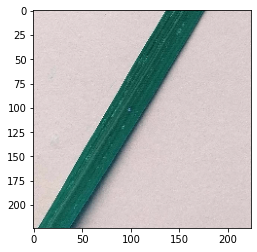

<Figure size 432x288 with 0 Axes>

SOURCE: class: LeafBlast, file: LeafBlast/IMG_20190419_105830.jpg
PREDICTED: class: Hispa, confidence: 0.953896


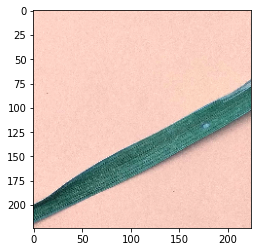

SOURCE: class: LeafBlast, file: LeafBlast/IMG_20190419_125251.jpg
PREDICTED: class: LeafBlast, confidence: 0.984642


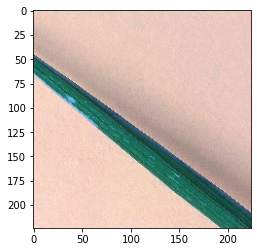

<Figure size 432x288 with 0 Axes>

SOURCE: class: BrownSpot, file: BrownSpot/IMG_20190420_190858.jpg
PREDICTED: class: BrownSpot, confidence: 0.990413


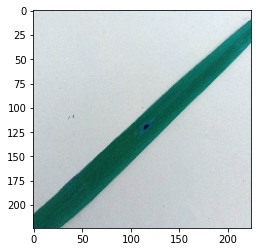

<Figure size 432x288 with 0 Axes>

SOURCE: class: Hispa, file: Hispa/IMG_20190419_110501.jpg
PREDICTED: class: Hispa, confidence: 0.722563


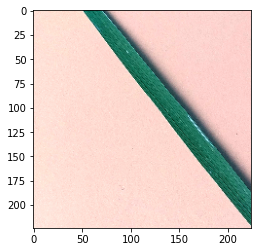

<Figure size 432x288 with 0 Axes>

In [95]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()